In [1]:
import pandas as pd
import numpy as np

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV

import graphviz 
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from sklearn.metrics import top_k_accuracy_score
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv("../tabela_final_treinamento.csv")

X = data.iloc[:, 0:225]
Y = data.iloc[:, -1]

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, stratify=Y, test_size=0.20, random_state=42)

In [4]:
scaler_train = StandardScaler()

In [5]:
scaler_train.fit(X_train)
normalized_train = scaler_train.transform(X_train)
normalized_train

array([[-0.05492008, -0.19108476, -0.36056737, ..., -0.41935759,
        -0.31903784, -0.1211944 ],
       [-0.05492008,  0.01865806, -0.0199829 , ...,  0.67472059,
        -0.31903784, -0.1211944 ],
       [-0.05492008, -0.25101129, -0.46536259, ..., -0.41935759,
        -0.31903784, -0.1211944 ],
       ...,
       [-0.05492008,  0.07858459, -0.30816976, ..., -0.41935759,
        -0.31903784,  0.00455051],
       [-0.05492008, -0.19108476, -0.30816976, ..., -0.41935759,
        -0.31903784, -0.1211944 ],
       [-0.05492008,  0.07858459, -0.20337454, ..., -0.41935759,
        -0.31903784, -0.05832194]])

In [6]:
scaler_test = StandardScaler()

In [7]:
scaler_test.fit(X_test)
normalized_test = scaler_test.transform(X_test)
normalized_test

array([[-0.05381314, -0.41482246, -0.72504254, ..., -0.50609757,
        -0.3808215 , -0.36780542],
       [-0.05381314,  0.03317813,  0.3631335 , ...,  0.245966  ,
        -0.3808215 , -0.36780542],
       [-0.05381314, -0.24682224, -0.28977212, ...,  0.245966  ,
        -0.3808215 , -0.36780542],
       ...,
       [-0.05381314, -0.35882238, -0.47631659, ..., -0.50609757,
        -0.3808215 , -0.36780542],
       [-0.05381314, -0.35882238, -0.47631659, ..., -0.50609757,
        -0.3808215 , -0.36780542],
       [-0.05381314, -0.41482246, -0.56958882, ..., -0.50609757,
        -0.3808215 , -0.36780542]])

In [8]:
param_grid = {"C": [0.01, 0.1, 1, 10, 100], 
              "kernel": ["linear", "poly", "rbf"],
              "gamma": [0.1, 1, 10],
              "tol": [0.1, 0.001, 0.00001]
             }

In [9]:
classfier = SVC(probability=True)

In [10]:
search = HalvingGridSearchCV(classfier, param_grid, scoring="f1_weighted").fit(X_train, y_train) 

In [10]:
search_normalized = HalvingGridSearchCV(classfier, param_grid, scoring="f1_weighted").fit(normalized_train, y_train) 

In [16]:
search.best_params_

{'C': 0.01, 'gamma': 10, 'kernel': 'linear', 'tol': 0.001}

In [17]:
search.score(X_test, y_test)

0.46676929977071857

In [11]:
search_normalized.score(normalized_test, y_test)

0.4421676297037091

In [12]:
y_score = search.predict_proba(X_test)

In [15]:
top_k_accuracy_score(y_test, y_score, k=2, labels=[1, 2, 3, 4, 5])

0.8373287671232876

In [18]:
y_pred_HGS = search.predict(X_test)

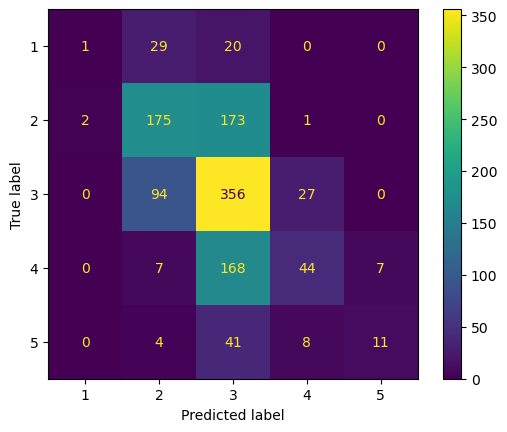

In [19]:
cm_HGS = confusion_matrix(y_test, y_pred_HGS, labels=search.classes_)
disp_HGS = ConfusionMatrixDisplay(confusion_matrix=cm_HGS,
                              display_labels=search.classes_)
disp_HGS.plot()
plt.show()